#### Summary plots for the two openfield sessions in the OF-VR-OF experiment

In [1]:
import numpy as np
import pandas as pd
import os
%matplotlib widget

In [7]:
def plot_hist_col(df, cols, title=""):
    import pandas as pd
    import matplotlib.pyplot as plt
    # Plotting the histogram
    fig, axs = plt.subplots(1, len(cols), figsize=(8, 2))
    for ax, col in zip(axs, cols):
        ax.hist(df[col], bins=20, edgecolor='black')
        ax.set_xlabel(col)
    axs[0].set_ylabel('Frequency')
    # Display the plot
    # Adjust layout to prevent overlap
    plt.tight_layout()
    fig.suptitle(title, fontsize=8)
    plt.show()

def plot_scatter_col(df1,df2, cols, title="",alpha=0.1):
    import pandas as pd
    import matplotlib.pyplot as plt
    # Plotting the histogram
    fig, axs = plt.subplots(1, len(cols), figsize=(8, 2))
    for ax, col in zip(axs, cols):
        col_min = min(min(df1[col]), min(df2[col]))
        col_max = max(max(df1[col]), max(df2[col]))
        ax.plot([col_min, col_max],[col_min, col_max], color="blue", alpha=0.3)
        ax.scatter(df1[col], df2[col], color="black", alpha=alpha)
        ax.set_xlabel(col)
        ax.set_aspect('equal')
    # Display the plot
    # Adjust layout to prevent overlap
    plt.tight_layout() 
    fig.suptitle(title, fontsize=8)
    plt.show()

#### Plotting open field scores 1

In [ ]:
project_path = "/mnt/datastore/Harry/Cohort11_april2024/derivatives/"

all_spike_data = pd.DataFrame()
for mouse in ["M20", "M21"]:
    for day in np.arange(15, 29):
        day = "D"+str(day)
        mouse_day = mouse+"_"+day
        try:
            of_paths = [f.path for f in os.scandir(project_path+mouse+"/"+day+"/of/") if f.is_dir()]
            of1_path = [s for s in of_paths if "OF1" in s][0]
            spike_data = pd.read_pickle(of1_path+"/processed/kilosort4/spikes.pkl")
            spike_data["si_Isec"] = spike_data["spatial_information_Isec_score"] # rename long column names
            plot_hist_col(spike_data, cols=["grid_score", "grid_spacing", "speed_score", "border_score", 
                                            "si_Isec", "hd_score"], title=mouse_day+"_OF1")
            all_spike_data = pd.concat([all_spike_data, spike_data], ignore_index=True)
        except:
            print("")

plot_hist_col(spike_data, cols=["grid_score", "grid_spacing", "speed_score", "border_score", "si_Isec", "hd_score"], title="all days M20,M21, OF2")




#### Plotting open field scores 2

In [ ]:
project_path = "/mnt/datastore/Harry/Cohort11_april2024/derivatives/"

all_spike_data = pd.DataFrame()
for mouse in ["M20", "M21"]:
    for day in np.arange(15, 29):
        day = "D"+str(day)
        mouse_day = mouse+"_"+day
        try:
            of_paths = [f.path for f in os.scandir(project_path+mouse+"/"+day+"/of/") if f.is_dir()]
            of2_path = [s for s in of_paths if "OF2" in s][0]
            spike_data = pd.read_pickle(of2_path+"/processed/kilosort4/spikes.pkl")
            spike_data["si_Isec"] = spike_data["spatial_information_Isec_score"] # rename long column names
            plot_hist_col(spike_data, cols=["grid_score", "grid_spacing", "speed_score", "border_score", 
                                            "si_Isec", "hd_score"], title=mouse_day+"_OF2")
            all_spike_data = pd.concat([all_spike_data, spike_data], ignore_index=True)
        except:
            print("")

plot_hist_col(spike_data, cols=["grid_score", "grid_spacing", "speed_score", "border_score", "si_Isec", "hd_score"], title="all days M20,M21,OF2")


## Open field metrics 1 vs 2

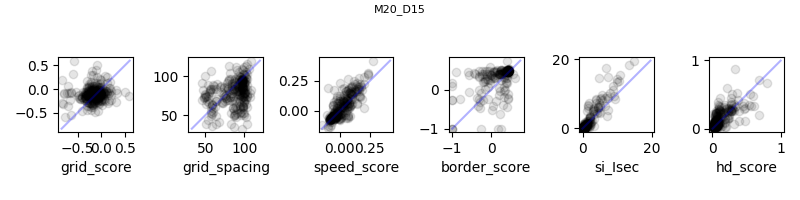

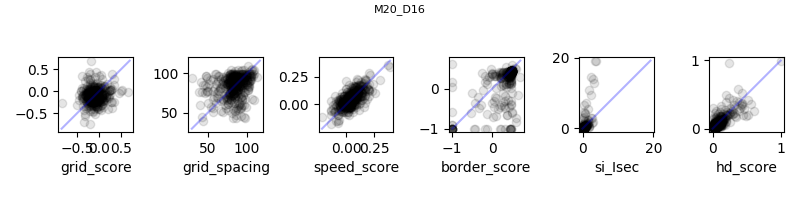

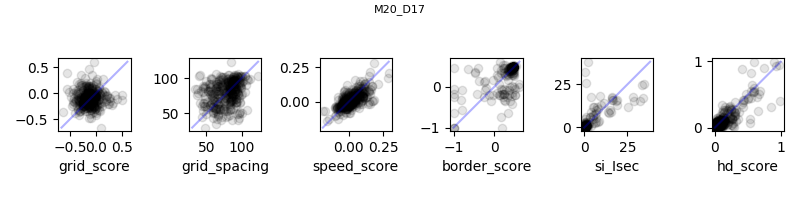

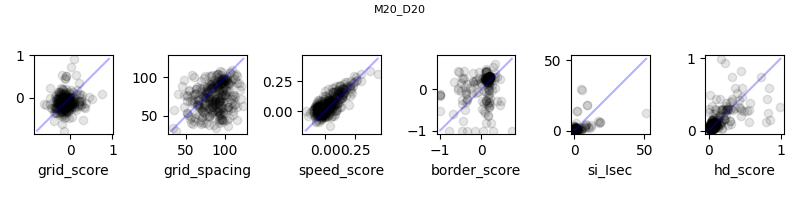

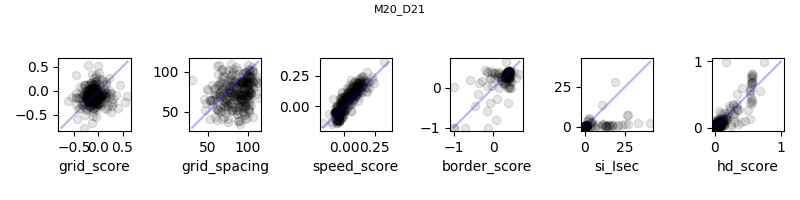

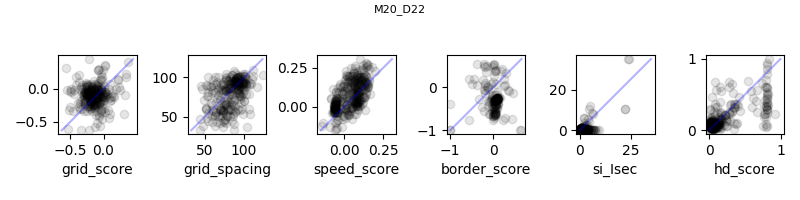

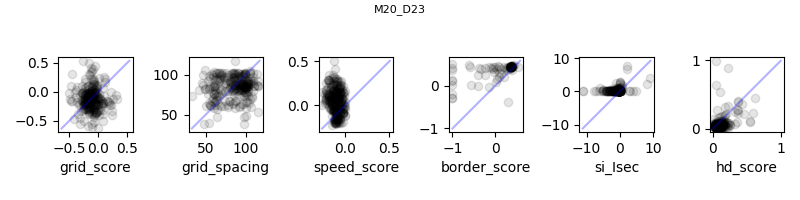

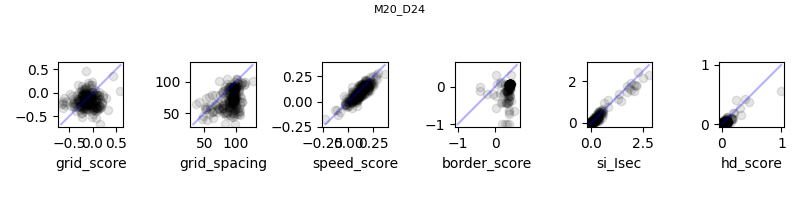

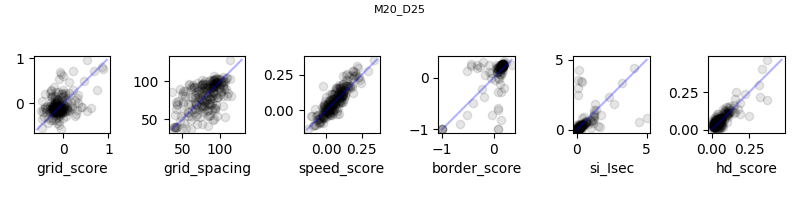

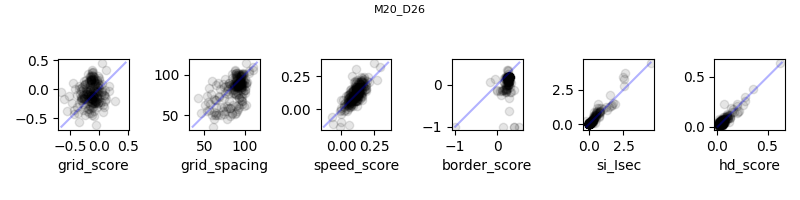

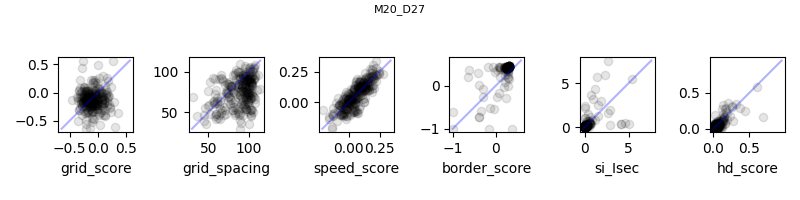

/tmp/ipykernel_16314/4104596354.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, len(cols), figsize=(8, 2))


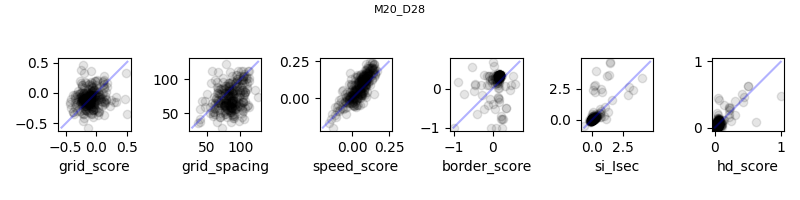

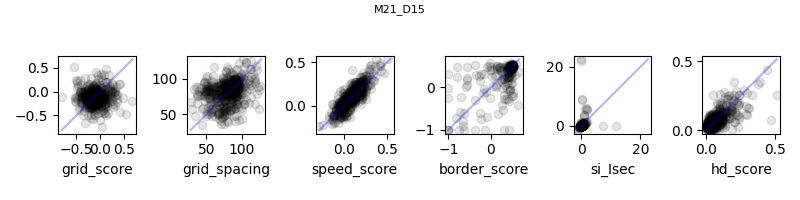

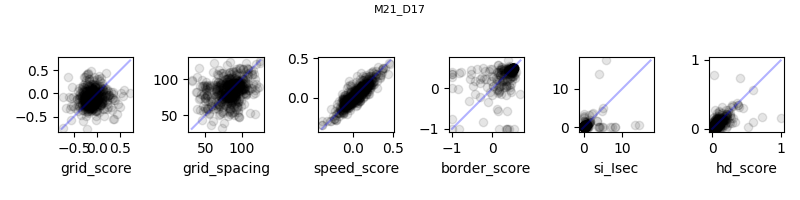

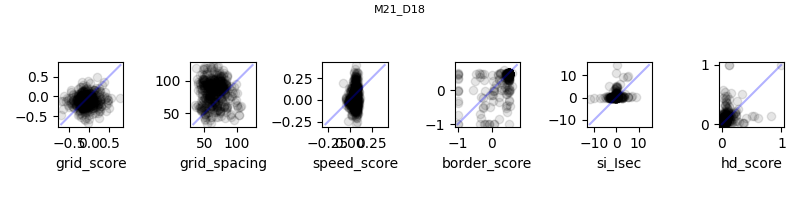

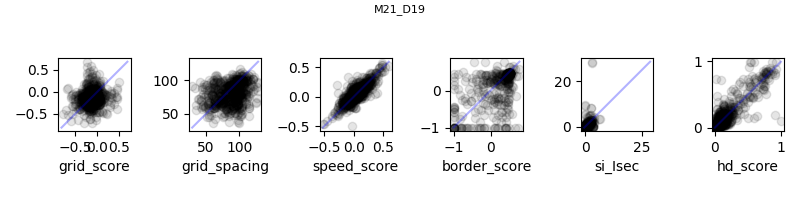

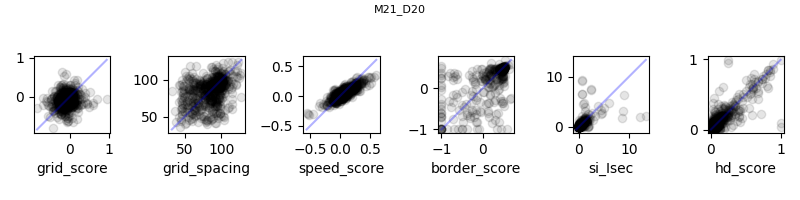

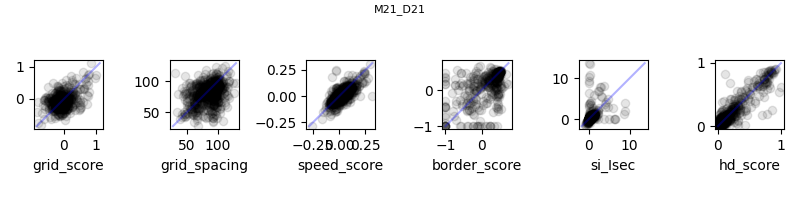

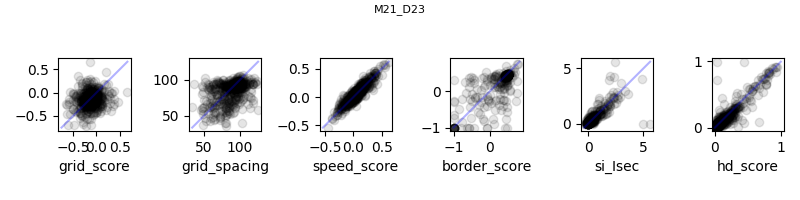

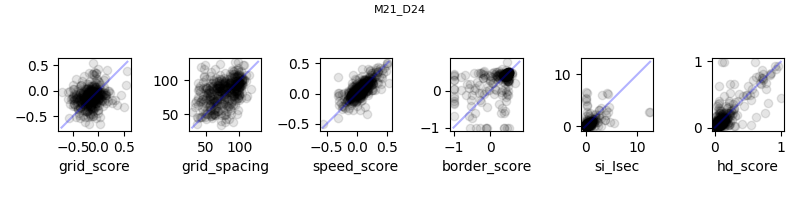

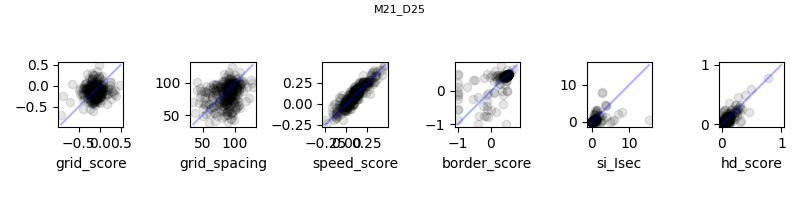

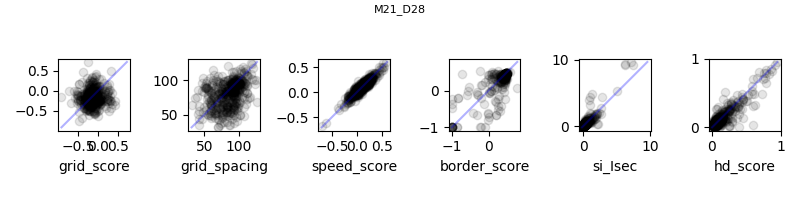

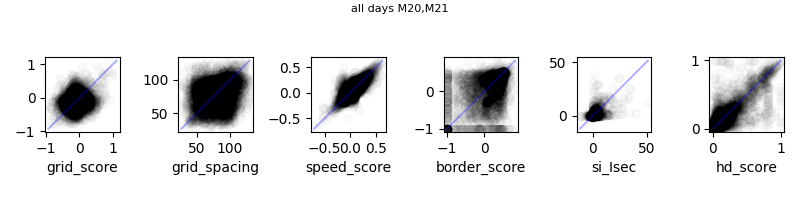

In [9]:
project_path = "/mnt/datastore/Harry/Cohort11_april2024/derivatives/"

all_spike_data_of1 = pd.DataFrame()
all_spike_data_of2 = pd.DataFrame()
for mouse in ["M20", "M21"]:
    for day in np.arange(15, 29):
        day = "D"+str(day)
        mouse_day = mouse+"_"+day
        try:
            of_paths = [f.path for f in os.scandir(project_path+mouse+"/"+day+"/of/") if f.is_dir()]
            of1_path = [s for s in of_paths if "OF1" in s][0]
            of2_path = [s for s in of_paths if "OF2" in s][0]
            spike_data_of1 = pd.read_pickle(of1_path+"/processed/kilosort4/spikes.pkl")
            spike_data_of2 = pd.read_pickle(of2_path+"/processed/kilosort4/spikes.pkl")
            spike_data_of1["si_Isec"] = spike_data_of1["spatial_information_Isec_score"] # rename long column names
            spike_data_of2["si_Isec"] = spike_data_of2["spatial_information_Isec_score"] # rename long column names
            plot_scatter_col(spike_data_of1, spike_data_of2, cols=["grid_score", "grid_spacing", "speed_score", "border_score","si_Isec", "hd_score"], title=mouse_day)
            all_spike_data_of1 = pd.concat([all_spike_data_of1, spike_data_of1], ignore_index=True)
            all_spike_data_of2 = pd.concat([all_spike_data_of2, spike_data_of2], ignore_index=True)
        except:
            print("")

plot_scatter_col(all_spike_data_of1, all_spike_data_of2, 
                 cols=["grid_score", "grid_spacing", "speed_score", 
                       "border_score", "si_Isec", "hd_score"], title="all days M20,M21", alpha=0.02)
